In [79]:
# importing the libraries
import numpy as np
import pandas as pd



In [80]:
# opening the data
#everything is ASCII except for that single 0x92 byte
# decode that  in a encoding='cp1252'

df=pd.read_csv('GSAF5.csv', encoding='cp1252')
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6,NaN,NaN
5988,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5,NaN,NaN
5989,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4,NaN,NaN
5990,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3,NaN,NaN


In [81]:
### General insights
df.shape

# check the shape of our dataframe - 5992 rows by 24 columns

(5992, 24)

In [82]:
df.columns
# check the columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [83]:
df.dtypes
#check the types of columns

Case Number               object
Date                      object
Year                       int64
Type                      object
Country                   object
Area                      object
Location                  object
Activity                  object
Name                      object
Sex                       object
Age                       object
Injury                    object
Fatal (Y/N)               object
Time                      object
Species                   object
Investigator or Source    object
pdf                       object
href formula              object
href                      object
Case Number.1             object
Case Number.2             object
original order             int64
Unnamed: 22               object
Unnamed: 23               object
dtype: object

In [84]:
df['Sex '].value_counts()


M      4835
F       585
M         2
.         1
lli       1
N         1
Name: Sex , dtype: int64

In [85]:
#the column names also need cleaning
#treating the columns index for more readable and manipulating
df.columns=[x.strip().replace(' ','_') for x in df.columns]
x=[print(i) for i in df.columns]

Case_Number
Date
Year
Type
Country
Area
Location
Activity
Name
Sex
Age
Injury
Fatal_(Y/N)
Time
Species
Investigator_or_Source
pdf
href_formula
href
Case_Number.1
Case_Number.2
original_order
Unnamed:_22
Unnamed:_23


In [86]:
Checking 

NameError: name 'Checking' is not defined

In [87]:
df.isna().sum()
# check for num value

Case_Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal_(Y/N)                 19
Time                      3213
Species                   2934
Investigator_or_Source      15
pdf                          0
href_formula                 1
href                         3
Case_Number.1                0
Case_Number.2                0
original_order               0
Unnamed:_22               5991
Unnamed:_23               5990
dtype: int64

In [88]:
df.isna().sum()/len(df)
#percentage

Case_Number               0.000000
Date                      0.000000
Year                      0.000000
Type                      0.000000
Country                   0.007176
Area                      0.067089
Location                  0.082777
Activity                  0.087951
Name                      0.033378
Sex                       0.094626
Age                       0.447430
Injury                    0.004506
Fatal_(Y/N)               0.003171
Time                      0.536215
Species                   0.489653
Investigator_or_Source    0.002503
pdf                       0.000000
href_formula              0.000167
href                      0.000501
Case_Number.1             0.000000
Case_Number.2             0.000000
original_order            0.000000
Unnamed:_22               0.999833
Unnamed:_23               0.999666
dtype: float64

In [89]:
df['Unnamed:_23'].value_counts()
# this columns has more than 90% non value , they dont matter

Teramo             1
change filename    1
Name: Unnamed:_23, dtype: int64

In [90]:
#find the not non value rows in 'Unnamed:_22' and 'Unnamed:_23'
# simple concant to see everything

pd.concat([
           df.loc[pd.notnull(df["Unnamed:_22"])] ,
            df.loc[pd.notnull(df["Unnamed:_23"])] 
                ])

# it seems it is some comments of records change
# irrelevant for our 

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number.1,Case_Number.2,original_order,Unnamed:_22,Unnamed:_23
1247,2006.06.18,18-Jun-06,2006,Unprovoked,BRAZIL,Pernambuco,"Punta Del Chifre Beach, Olinda",Body boarding,Humberto Pessoa Batista,M,...,NaN,globalsurfnews.com,2006.06.18-Batista.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.06.18,2006.06.18,4746,stopped here,NaN
4182,1952.07.13,13-Jul-52,1952,Provoked,USA,California,"San Diego, San Diego County",Fishing,"Gerald Howard, on board sportsfishing boat Ter...",M,...,NaN,"L.A. Times, 7/14/1952",1952.07.13-Howard.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.07.13,1952.07.13,1811,NaN,Teramo
5585,1879.03.10,10-Mar-1879,1879,Invalid,AUSTRALIA,New South Wales,Near Sydney,The steamship Bonnie Dundee lost in collision,Cabin boy of the Bonnie Dundee,M,...,NaN,"Star, 3/22/1879",1879.03.10-Bonnie-Dundee.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1879.03.10,1879.03.10,408,NaN,change filename


In [91]:
#removing the two last columns
df_copy=df.drop(columns=['Unnamed:_23','Unnamed:_22']).copy()

In [92]:
# select a random of rows to see the types of values and how to aproach the cleaning

df.sample(n=10)

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number.1,Case_Number.2,original_order,Unnamed:_22,Unnamed:_23
1210,2006.09.03.b,03-Sep-06,2006,Unprovoked,BRAZIL,NaN,NaN,NaN,Darlan dos Santos Luz,M,...,NaN,"JC Online, 6/26/2023",2006.09.03.b-Darlan-dos-Santos-Luz.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.09.03.b,2006.09.03.b,4783,NaN,NaN
2293,1992.12.23,23-Dec-92,1992,Unprovoked,USA,Hawaii,"Chun's Reef, Laniakea, O'ahu",Lying on surfboard,Gary M. Chun,M,...,"Tiger shark, 3 m to 4.9 m [10' to 16']","L. Taylor (1993), pp.114-115; Orlando Sentinel...",1992.12.23-Chun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1992.12.23,1992.12.23,3701,NaN,NaN
3327,1966.09.10,10-Sep-66,1966,Unprovoked,AUSTRALIA,Western Australia,Roe Reef off Rottnest Island,Spearfishing,Frank Paxman,M,...,"Mako shark, 1.9 m [6.5']","The West Australian (Perth), 9/14/1966; H.D.Ba...",1966.09.10-Paxman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1966.09.10,1966.09.10,2666,NaN,NaN
3304,1967.03.19,19-Mar-67,1967,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Paradise Reef,Spearfishing,Len Jones,M,...,"White shark, 3 m [10']","L. Jones, M. Levine, GSAF;. D'Aubrey, ORI",1967.03.19-LenJones.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1967.03.19,1967.03.19,2689,NaN,NaN
446,2013.06.06.b,06-Jun-13,2013,Provoked,USA,Florida,"Off Snipe Point, Florida Keys, Monroe County",Fishing for sharks,Walter Kefauver,M,...,"Lemon shark, 4'","CBS Miami, 6/6/2013",2013.06.06.b-Kefauver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.06.06.b,2013.06.06.b,5547,NaN,NaN
1341,2005.07.23,23-Jul-05,2005,Unprovoked,USA,Florida,"Ormond Beach, Volusia County",Surfing,Bob Thompson,M,...,NaN,"D. Salamone, GSAF",2005.07.23-Thompson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2005.07.23,2005.07.23,4652,NaN,NaN
4148,1953.07.09,09-Jul-53,1953,Boating,CANADA,Nova Scotia,"Fourchu, Cape Breton Island",Fishing for lobsters,"12' to 14' dory, occupants: John D. Burns & Jo...",M,...,"White shark, 3.7 m [12'], 500 to 500-kg [1,200...","R. Collier, pp.169-170;Bigelow & Schroeder; D...",1953.07.09-Burns.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1953.07.09,1953.07.09,1845,NaN,NaN
1760,2000.12.11,11-Dec-00,2000,Boat,AUSTRALIA,South Australia,"3 km off Port Victoria, Yorke Peninsula",Fishing for whiting,"3.5 -metre fibreglass boat, occupants: Harry U...",NaN,...,"White shark, 4.5 m [14'9""]","The Dominion, 12/13/2000; Northern Territory N...",2000.12.11- boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.12.11,2000.12.11,4233,NaN,NaN
3128,1971.10.14,14-Oct-71,1971,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,"North Beach, Durban",Swimming,Werner Bayer,M,...,1.5 m to 2 m shark,J. Bass,1971.10.14-Bayer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1971.10.14,1971.10.14,2865,NaN,NaN
3081,1973.02.27,27-Feb-73,1973,Unprovoked,MEXICO,Guerrero,"Revolcadero Beach, Acapulco",Swimming,Dr. Leo Ephraim Fischer,NaN,...,NaN,"Reno Gazette, 4/8/1973; A.Resciniti, pp.108-109",1973.02.27-Ephraim.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1973.02.27,1973.02.27,2912,NaN,NaN


In [93]:
#checking for differente values from 3 collums

pd.Series((df_copy['Case_Number.1']==df_copy['Case_Number.2'])
          & (df_copy['Case_Number.2']==df_copy['Case_Number'])).value_counts()

True     5979
False      13
dtype: int64

In [94]:
df[(pd.Series((df_copy['Case_Number.1']==df_copy['Case_Number.2'])
          & (df_copy['Case_Number.2']==df_copy['Case_Number'])) )== False]

# with this function i could see all of the rows where the 3 differente case numbers are diferent
#all of the other rows are equal and the different are just minor diferences
# i also notice that i could extract a more "clean date from the records"

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number.1,Case_Number.2,original_order,Unnamed:_22,Unnamed:_23
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN
33,2016.07.14.4,Reported 14-Jul-2016,2016,Unprovoked,BAHAMAS,NaN,Tiger Beach,Scuba Diving,Michael Dornellas,M,...,"Lemon shark, 9'","GrindTV, 7/14/2016",2016.07.14.R-TigerBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.07.14.R,2016.07.14.4,5960,NaN,NaN
97,2016.01.24.b,24-Jan-16,2016,Unprovoked,USA,Texas,Off Surfside,Spearfishing,Keith Love,M,...,Bull sharks x 2,K. Love,2016.01.24.b-Love.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.01.24.b,2016.01.24.b,5896,NaN,NaN
116,2015.12.23,07-Nov-15,2015,Invalid,USA,Florida,"Paradise Beach, Melbourne, Brevard County",Surfing,Ryla Underwood,F,...,Shark involvement not confirmed,"Fox25Orlando, 11/7/2015",2015.11.07-Underwood.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.11.07,2015.12.23,5876,NaN,NaN
121,2015.10.28.a,28-Oct-15,2015,Unprovoked,USA,Hawaii,"Malaka, Oahu",Body boarding,Raymond Senensi,M,...,NaN,"Star Advertiser, 10/28/2015",2015.10.28-Senensi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.10.28,2015.10.28.a,5871,NaN,NaN
169,2015.07-10,10-Jul-15,2015,Unprovoked,USA,California,"Huntington Beach, Orange County",Surfing,Danny Miskin,M,...,"White shark, 7'","KTLA, 7/10/2015",2015.07.10-Miskin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.10,2015.07.10,5823,NaN,NaN
3296,1967.07.05,05-Jul-67,1967,Unprovoked,TURKEY,Mugla Province,Kucukada Island,Spearfishing,Gungor Guven,M,...,NaN,"C. Moore, GSAF",1967.07.05-Guven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1967/07.05,1967.07.05,2697,NaN,NaN
3569,"1962,08.30.b",30-Aug-62,1962,Boat,TURKEY,Antalya Province,Ucagiz,NaN,Occupant: Hasan Olta,M,...,NaN,"C.Moore, GSAF",1962.08.30.b-pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1962.08.30.b,"1962,08.30.b",2424,NaN,NaN
3654,1961.09.02.R,Reported 06-Sep-1961,1961,Provoked,ITALY,Venice Province,Chioggia,Fishing,Pollione Perrini & Fioravante Perini,M,...,1 m shark,"C. Moore, GSAF",1961.09.06.R-Chioggia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,"1961.09,06.R",1961.09.02.R,2339,NaN,NaN
4177,1952.08.05,05-Aug-52,1952,Provoked,ITALY,Teramo,Giulianova,Fishing,Vittorio Speca,NaN,...,2m shark,"C. Moore, GSAF",1952.08.05-Speca.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.08.04,1952.08.05,1816,NaN,NaN


In [95]:
# I will group for year and count the number of shark attacks for our first question


records_year=df.groupby(by="Year").size().copy()


2.24 µs ± 53 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


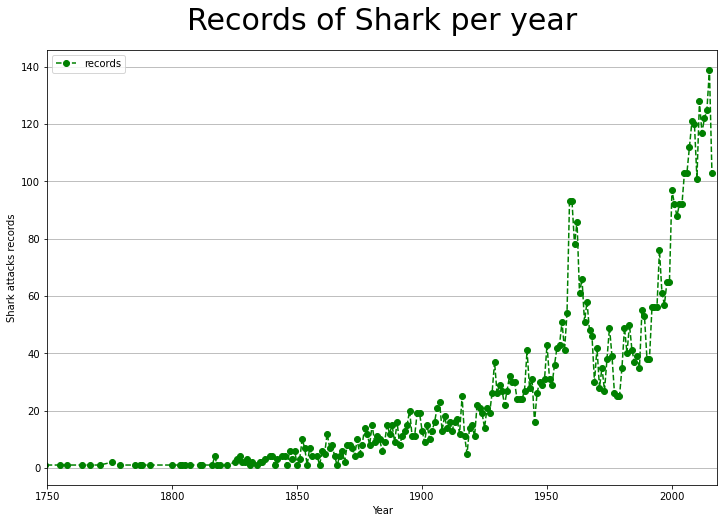

In [96]:
# for plotting
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%timeit [x**2 for x in range(10)]
%magic

# How to initialize the two essential objects for plotting:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(records_year,
       color='green',
       marker='o',
       linestyle='dashed',
       label='records',
       )
ax.set_xlim([1750,2018])
ax.set_xlabel('Year', fontsize=10);
ax.set_ylabel('Shark attacks records', fontsize=10);
ax.set_title('Records of Shark per year', fontsize=30, pad=20);
ax.grid(axis='y')
ax.legend()



In [97]:
##  FALSE insights
# this doenst show us the increase of shark attacks but the number of records are
# you can relate this to the covid infections statisctis because there is more cases doenst mean there are rising but could also mean there are more testing


In [110]:
# extract the date from column 1
# assing a new columm with date from case number
# clean value with regex
# data type 1111011011

df_copy=df_copy.assign(date_cn=df_copy['Case_Number'].astype(str).str[0:10])

df_copy

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Time,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number.1,Case_Number.2,original_order,date_cn
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,2016.09.18
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,2016.09.18
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,2016.09.18
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,2016.09.17
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,2016.09.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6,ND.0005
5988,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5,ND.0004
5989,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4,ND.0003
5990,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3,ND.0002


In [122]:
df_copy['date_cn']=pd.to_datetime(df_copy['date_cn'],format='%Y.%m.%d',errors='coerce') 

In [123]:


df_copy.isna().sum()

Case_Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal_(Y/N)                 19
Time                      3213
Species                   2934
Investigator_or_Source      15
pdf                          0
href_formula                 1
href                         3
Case_Number.1                0
Case_Number.2                0
original_order               0
date_cn                    862
dtype: int64